CARDIORESPIRATORY MEASUREMENTS OF ATHLETES IN SPORTS LIKE KAYAKING, FENCING AND TRIATHLON

10_PYTHONCHARMS

Introduction: This dataset is used to study HRV during excercise in Atheletes during Graded exercise testing.

Data variables: 

ID : Participant identifier
time : Time since the Graded effort test starts, in seconds
RR : Heart Rate R-wave to R-Wave interval, in milliseconds
VO2 : Oxygen consumption, in mL/min
power: Mechanical power of the cycloergormeter, in watts
HR : Heart rate (hr)/min
HRV : Difference between RR intervals and its standard deviation.
BMI : Body mass index


In [296]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [300]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'wordcloud'

In [196]:
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Atheletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")


Q1 Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [197]:
AllAthletesData=pd.merge(Kayaking,Triathlon,how='outer').merge(Fencing,how='outer')
AllAthletesData.to_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData',index=False)
AllAthletesData.head()

ID     time     RR       VO2  power
0  11 -168.600  727.0  0.287147      0
1  11 -167.872  728.0  0.287147      0
2  11 -167.148  724.0  0.287147      0
3  11 -166.484  664.0  0.320580      0
4  11 -165.836  648.0  0.320580      0

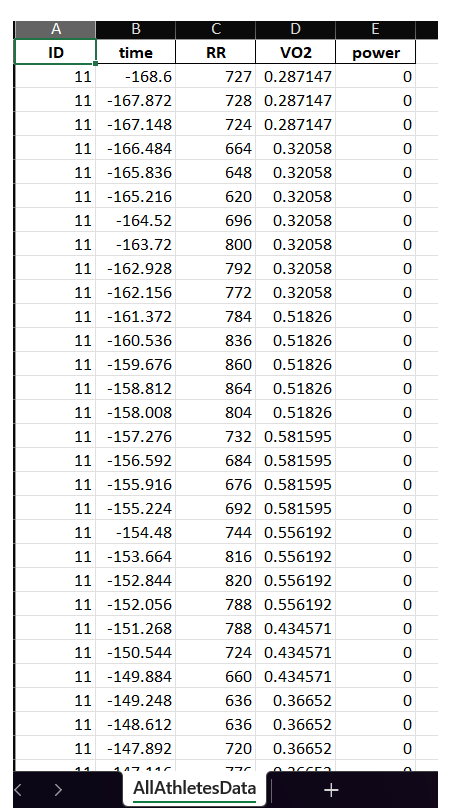

2.Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [198]:
df_excersizetype=pd.read_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData')
df_excersizetype.loc[df_excersizetype['time'] < 0,'ExType']='Warm Up' 
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] > 0), 'ExType'] = 'GET'
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] == 0), 'ExType'] = 'Cool Down'
df_excersizetype

ID     time     RR       VO2  power     ExType
0      11 -168.600  727.0  0.287147      0    Warm Up
1      11 -167.872  728.0  0.287147      0    Warm Up
2      11 -167.148  724.0  0.287147      0    Warm Up
3      11 -166.484  664.0  0.320580      0    Warm Up
4      11 -165.836  648.0  0.320580      0    Warm Up
...    ..      ...    ...       ...    ...        ...
52057  10  942.700  428.0  0.786363      0  Cool Down
52058  10  943.124  424.0  0.786363      0  Cool Down
52059  10  943.552  428.0  0.786363      0  Cool Down
52060  10  943.976  424.0  0.786363      0  Cool Down
52061  10  944.404  428.0  0.786363      0  Cool Down

[52062 rows x 6 columns]

3.What was the average time each tested lasted excluding warm up for all athletes?

In [199]:
#finding the Average excluding the -ve time values
df_Average=df_excersizetype[df_excersizetype['time'] >= 0]
print('The average time each tested lasted excluding warm up:',round(df_Average['time'].mean(),2))

The average time each tested lasted excluding warm up: 604.0


4.Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

In [200]:
#HRV calculation for each sport

Kayaking['DiffRRIntervals']= Kayaking['RR'].diff()
Kayaking['HRV']= Kayaking['DiffRRIntervals'].std()
Triathlon['DiffRRIntervals']= Triathlon['RR'].diff()
Triathlon['HRV']= Triathlon['DiffRRIntervals'].std()
Fencing['DiffRRIntervals']= Fencing['RR'].diff()
Fencing['HRV']= Fencing['DiffRRIntervals'].std()
dfHRV=pd.concat([Kayaking,Triathlon,Fencing])

#rounding to two decimal spaces

dfHRV['HRV']=dfHRV['HRV'].apply(lambda x:round(x,2))
#finding Max HRV
maxHRV=dfHRV['HRV'].max() 
print('Maximum HRV is : ',maxHRV)
#finding athletes wise HRV
dfHRV=dfHRV.groupby(['ID','HRV'], as_index=False).count()
print('Athletes HRV details:')
print(dfHRV[['ID','HRV']])
# fining the MAX HRV  athelets

max_df=pd.merge(dfHRV,Atheletes, on='ID',how='inner')
maxsprt = max_df.loc[max_df['HRV']  == maxHRV]
maxsprt1=maxsprt.groupby(['ID','HRV'], as_index=False).count()
print('Maximum HRV Athletes details:')
maxsprt[['ID','sport','First Name','Last Name','HRV']]

#maxsprt=max_df.loc[(max_df['HRV1'] == maxHRV )]

#dfHRV

Maximum HRV is :  315.77
Athletes HRV details:
    ID     HRV
0    1  203.20
1    2  203.20
2    3  203.20
3    4  203.20
4    5  203.20
5    6  203.20
6    7  203.20
7    8  203.20
8    9  203.20
9   10  203.20
10  11  315.77
11  12  315.77
12  13  315.77
13  14  315.77
14  15  315.77
15  16  315.77
16  17   30.01
17  18   30.01
Maximum HRV Athletes details:


ID  sport First Name  Last Name     HRV
10  11  kayak   Isabella    Griffin  315.77
11  12  kayak      Caleb      Dixon  315.77
12  13  kayak        Mia  Carpenter  315.77
13  14  kayak     Harper   Mitchell  315.77
14  15  kayak      Mason    Wallace  315.77
15  16  kayak      Logan   Anderson  315.77

5.What was the average time each test lasted (including warm up) for all athletes?

In [201]:
#finding avaerage of time from all sports

print('Average Time for All Athletes (including warm up):', round(df_excersizetype['time'].mean(),2))

Average Time for All Athletes (including warm up): 547.46


6.What was the most common  wattage (above 0) achieved by participants and for how many seconds (average time)?
You may choose to show averages based on any one/all sports. 

In [202]:
#creating the Data set for distinct powers

wattage=df_excersizetype.groupby(['power'], as_index=False)['VO2'].count()
#removing the 0 wattage from the list
filt=wattage['power']==0
wattage=wattage.drop(index=wattage[filt].index )
#print(wattage)
#Most common wattage by max count
maxcount=wattage['VO2'].max()
#print(maxcount)
df_participants=wattage[wattage['VO2']==maxcount]
#print(df_participants)
print('Most common watage is: ',df_participants.iat[0,0])
print('how many times repeated : ',maxcount)
# finding atheltes details by merging the most common wattage

df_participants=pd.merge(AllAthletesData,Atheletes,on='ID',how='inner').merge(df_participants,on='power',how='inner')
df_participants=df_participants.groupby(['First Name','Last Name','power'], as_index=False)['time'].mean()
print('Most common wattage achieved by participants and Average time in seconds:')
df_participants


Most common watage is:  50
how many times repeated :  6227
Most common wattage achieved by participants and Average time in seconds:


First Name  Last Name  power        time
0       Aiden    Bennett     50   91.458436
1         Ava   Thompson     50   92.727754
2       Caleb      Dixon     50   91.824262
3       Chloe      Price     50   77.081956
4       Ethan   Reynolds     50   85.053207
5       Grace    Simmons     50   93.438213
6      Harper   Mitchell     50   95.742682
7    Isabella    Griffin     50   98.357259
8     Jackson     Harper     50   89.064458
9        Liam    Sanchez     50   90.574331
10       Lily     Jordan     50   92.203131
11      Logan   Anderson     50  101.813951
12      Lucas     Foster     50   91.352021
13      Mason    Wallace     50   89.812655
14        Mia  Carpenter     50   89.784922
15     Olivia   Martinez     50  106.251675
16       Owen      Myers     50   91.152733
17     Sophia  Rodriguez     50   89.296063

7.Create a correlation matrix to show the relationship between HR, BMI and sport.

Correlation matrix:
                        HR       BMI  sport_fencing  sport_kayak  \
HR               1.000000 -0.056931       0.039244    -0.035366   
BMI             -0.056931  1.000000      -0.146282     0.520170   
sport_fencing    0.039244 -0.146282       1.000000    -0.821351   
sport_kayak     -0.035366  0.520170      -0.821351     1.000000   
sport_triathlon -0.008735 -0.607531      -0.345537    -0.251481   

                 sport_triathlon  
HR                     -0.008735  
BMI                    -0.607531  
sport_fencing          -0.345537  
sport_kayak            -0.251481  
sport_triathlon         1.000000  


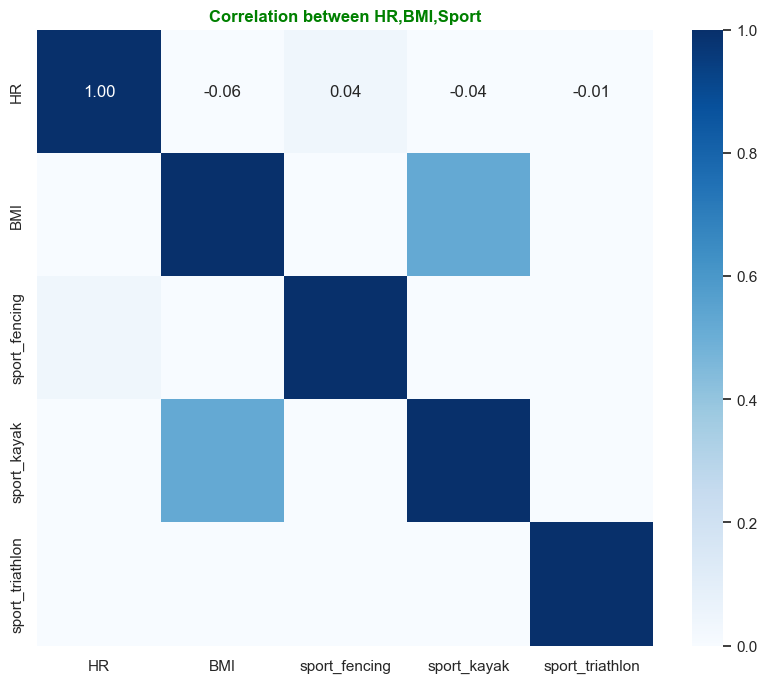

In [217]:
#-------------------------Please execute Q15 and Q16 to get BMI and HR values-----------------------------------
#BMI calculation
Atheletes['BMI']=Atheletes['Weight']/(Atheletes['Height']/100)**2

#DtaFrame for HR BMI and Sport
data=pd.merge(df_excersizetype,Atheletes, on='ID',how='inner')

# Finding Correlation:
correlationdata = data[['HR','BMI','sport']]
correlationSet = pd.get_dummies(correlationdata, columns = ['sport'])
correlationSet
correlationmatrix = correlationSet.corr()
print('Correlation matrix:\n',correlationmatrix)
#get true values into heatmap by using mask
np_mask=np.triu(np.ones_like(correlationmatrix,dtype=bool))
#correaltion in the plot
fig = plt.figure(figsize = (10, 8))

# creating the heatmap plot
sns.heatmap(correlationmatrix,cmap="Blues",vmin=0,vmax=1,annot=True,fmt="0.2f",square=True)
plt.title("Correlation between HR,BMI,Sport", color='Green',weight='bold')
plt.show()

8.What are the names of the kayaking athletes?

In [ ]:
#get names by matching kayak sport
uniqnames=Atheletes[Atheletes['sport'] =='kayak']
print('Names:\n ',uniqnames['First Name'] +uniqnames['Last Name'] )


9.What was the average HRV of the triathletes?

In [204]:
#Triathlon dataframe
print(Triathlon)
#finding Average HRV
avgTriathlon=Triathlon['HRV'].mean()
print('The average HRV of the triathletes is: ',round(avgTriathlon,2))

      ID     time     RR       VO2  power  DiffRRIntervals        HRV
0     17 -182.408  736.0  0.363762      0              NaN  30.006214
1     17 -181.672  736.0  0.363762      0              0.0  30.006214
2     17 -180.968  704.0  0.363762      0            -32.0  30.006214
3     17 -180.268  700.0  0.363762      0             -4.0  30.006214
4     17 -179.616  652.0  0.363762      0            -48.0  30.006214
...   ..      ...    ...       ...    ...              ...        ...
4976  18  947.288  536.0  0.507071      0              8.0  30.006214
4977  18  947.816  528.0  0.507071      0             -8.0  30.006214
4978  18  948.344  528.0  0.507071      0              0.0  30.006214
4979  18  948.884  540.0  0.507071      0             12.0  30.006214
4980  18  949.424  540.0  0.507071      0              0.0  30.006214

[4981 rows x 7 columns]
The average HRV of the triathletes is:  30.01


10.How long was athlete 12 in HR Zone 5?

In [218]:
#Creating data set for all sports by merging with athletes; this calculation of Zone5 was done in question-15
dfzone=pd.merge(df_excersizetype,Atheletes,on='ID',how='inner')
# finding the athelet id 12 and zone 5 
dfzonecat=dfzone[(dfzone['ID']==12) & (dfzone['Zone Type']=='Zone 5')]
#caluculating the time in hrs
print('Time in Hrs:', round(sum(dfzonecat['time']/3600),2))

Time in Hrs: 390.75


11.Create any 3d plot using any data. Values do not have to be from the dataset given. 

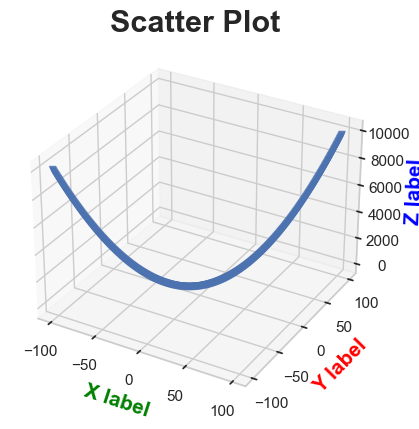

In [206]:
# creating the plot size
ax = plt.figure().add_subplot(projection='3d')
x=np.arange(-100,100,0.5)
y=np.arange(-100,100,0.5)
z=x*y
  
#creating the scatter plot by 3D format
ax.scatter(x,y,z, marker="v",alpha=0.8)
ax.set_title("Scatter Plot",fontsize=22,weight='bold')
ax.set_xlabel('X label',fontsize=15,weight='bold',color='green')
ax.set_ylabel('Y label',fontsize=15,weight='bold',color='red')
ax.set_zlabel('Z label',fontsize=15,weight='bold',color='blue')
plt.show()


12.What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

In [207]:
# creating the dataset by soring the VO2
dfzoneMax=dfzone.sort_values(by="VO2", ascending=False)
#removing the duplicates to find 3 max records with out repeating
dfzoneMax=dfzoneMax[['ID','First Name','Last Name','sport','VO2']].drop_duplicates()
print('The Highest 3 V02 Maxes recorded')
dfzoneMax.head(3)


The Highest 3 V02 Maxes recorded


ID First Name  Last Name  sport       VO2
10488  13        Mia  Carpenter  kayak  4.576774
10570  13        Mia  Carpenter  kayak  4.099752
10575  13        Mia  Carpenter  kayak  3.951029

13.Calculate the year of birth of each athlete and store it as a column in the tables.

In [208]:
#Get the Birth year
#get current year
from datetime import date
cur_date=date.today()
year=cur_date.year
#using apply function set the birth year by get year with age subtracting
Atheletes['Birth Year']=Atheletes['age'].apply(lambda x:year - x)
Atheletes

ID  age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0    1   15    53.7     161     50    140    fencing  Female   African   
1    2   15    56.2     162     80    127    fencing    Male   African   
2    3   16    89.9     191    155    300    fencing    Male     White   
3    4   16    76.5     180    215    275    fencing    Male     White   
4    5   17    76.4     186    110    172    fencing  Female     White   
5    6   17    65.6     169    131    186    fencing  Female     White   
6    7   15    49.8     165     65    108    fencing  Female     White   
7    8   15    51.2     165     80    133    fencing  Female     White   
8    9   14    57.1     176     50    125    fencing  Female   African   
9   10   14    58.8     177    101    162    fencing  Female   African   
10  11   18    84.8     182    174    268      kayak  Female   African   
11  12   18    86.0     183    170    294      kayak    Male   African   
12  13   18    83.9     183    144    267      kayak  Female     Asian   
13  14   13    62.3     171    140    170      kayak  Female     Asian   
14  15   13    63.5     172    125    156      kayak    Male    Latino   
15  16   16    70.4     182     79    175      kayak    Male    Latino   
16  17   12    39.9     156    101    145  triathlon    Male    Latino   
17  18   12    39.7     158     65    168  triathlon    Male    Latino   

   First Name  Last Name        BMI  Birth Year  
0      Olivia   Martinez  20.716793        2009  
1       Ethan   Reynolds  21.414419        2009  
2     Jackson     Harper  24.642965        2008  
3        Liam    Sanchez  23.611111        2008  
4         Ava   Thompson  22.083478        2007  
5      Sophia  Rodriguez  22.968383        2007  
6       Grace    Simmons  18.292011        2009  
7       Aiden    Bennett  18.806244        2009  
8       Chloe      Price  18.433626        2010  
9        Lily     Jordan  18.768553        2010  
10   Isabella    Griffin  25.600773        2006  
11      Caleb      Dixon  25.680074        2006  
12        Mia  Carpenter  25.053002        2006  
13     Harper   Mitchell  21.305701        2011  
14      Mason    Wallace  21.464305        2011  
15      Logan   Anderson  21.253472        2008  
16      Lucas     Foster  16.395464        2012  
17       Owen      Myers  15.902900        2012

14.What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

In [209]:
#Data frame by soring VO2
dfzoneMax=dfzone.sort_values(by="VO2", ascending=True)
#rempving the duplicates to get 3 min values
dfzoneMax=dfzoneMax[['ID','First Name','Last Name','sport','VO2']].drop_duplicates()
print('The lowest 3 V02 Maxes recorded:')
dfzoneMax.head(3)

The lowest 3 V02 Maxes recorded:


ID First Name Last Name    sport       VO2
46779   9      Chloe     Price  fencing  0.069354
46787   9      Chloe     Price  fencing  0.081389
49541  10       Lily    Jordan  fencing  0.122263

15.Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add 
    this as a column to every table:
Zone 1 (recovery/easy)       <100 HR max
Zone 2 (aerobic/base)        100-120 HR max
Zone 3 (tempo)        120-135 HR max
Zone 4 (lactate threshold)        135-155 HR max
Zone 5 (anaerobic)        155+ HR max and above

In [219]:
df_excersizetype['HR']=60/(df_excersizetype['RR']/1000)
df_excersizetype
df_excersizetype.loc[df_excersizetype['HR'] < 100,'Zone Type']='Zone 1'
df_excersizetype.loc[(df_excersizetype['HR'].between(100,120)), 'Zone Type'] = 'Zone 2'
df_excersizetype.loc[(df_excersizetype['HR'].between(121,135)), 'Zone Type'] = 'Zone 3'
df_excersizetype.loc[(df_excersizetype['HR'].between(136,155)), 'Zone Type'] = 'Zone 4'
df_excersizetype.loc[df_excersizetype['HR'] > 155, 'Zone Type'] = 'Zone 5'
df_excersizetype

ID     time     RR       VO2  power     ExType          HR Zone Type
0      11 -168.600  727.0  0.287147      0    Warm Up   82.530949    Zone 1
1      11 -167.872  728.0  0.287147      0    Warm Up   82.417582    Zone 1
2      11 -167.148  724.0  0.287147      0    Warm Up   82.872928    Zone 1
3      11 -166.484  664.0  0.320580      0    Warm Up   90.361446    Zone 1
4      11 -165.836  648.0  0.320580      0    Warm Up   92.592593    Zone 1
...    ..      ...    ...       ...    ...        ...         ...       ...
52057  10  942.700  428.0  0.786363      0  Cool Down  140.186916    Zone 4
52058  10  943.124  424.0  0.786363      0  Cool Down  141.509434    Zone 4
52059  10  943.552  428.0  0.786363      0  Cool Down  140.186916    Zone 4
52060  10  943.976  424.0  0.786363      0  Cool Down  141.509434    Zone 4
52061  10  944.404  428.0  0.786363      0  Cool Down  140.186916    Zone 4

[52062 rows x 8 columns]

Q16:Calculate the BMI of every athlete and display it as a list.

In [220]:
#BMI calculation
Athletes['BMI']=Athletes['Weight']/(Athletes['Height']/100)**2
#display(Athletes)
Athletes_BMI_list = Athletes['BMI'].round(2).tolist()
print('The BMI of every Athlete in list :')
print(Athletes_BMI_list)


The BMI of every Athlete in list :
[20.72, 21.41, 24.64, 23.61, 22.08, 22.97, 18.29, 18.81, 18.43, 18.77, 25.6, 25.68, 25.05, 21.31, 21.46, 21.25, 16.4, 15.9]


Q17:What is the maximum ventilatory threshold for triathletes.

In [221]:
# pulling data from DataFrame'Athletes'
#display(Athletes)
triathletes = Athletes[Athletes['sport'] == 'triathlon']

if not triathletes.empty:
    max_vt2_index = triathletes['P_vt2'].idxmax()
    max_vt2_triathlete = triathletes.loc[max_vt2_index]

    print('The maximum ventilatory threshold (VT2) for triathletes is', max_vt2_triathlete['P_vt2'], 'watts')
    print('This belongs to', max_vt2_triathlete['First Name'], max_vt2_triathlete['Last Name'], "aged", max_vt2_triathlete['age'])
else:
    print('No triathletes found in the dataset.')

The maximum ventilatory threshold (VT2) for triathletes is 168 watts
This belongs to Owen Myers aged 12


Q18:Display the number of athletes in every sport against the name of the sport.

In [222]:
#calculate the number of Athletes in each sport
sport_counts= Athletes['sport'].value_counts()
print('Number of athletes in every sport:')
for sport, count in sport_counts.items():
    print(sport, ':', count)
    

Number of athletes in every sport:
fencing : 10
kayak : 6
triathlon : 2


Q19:Display a bar chart showing the average V02 Max by sport.

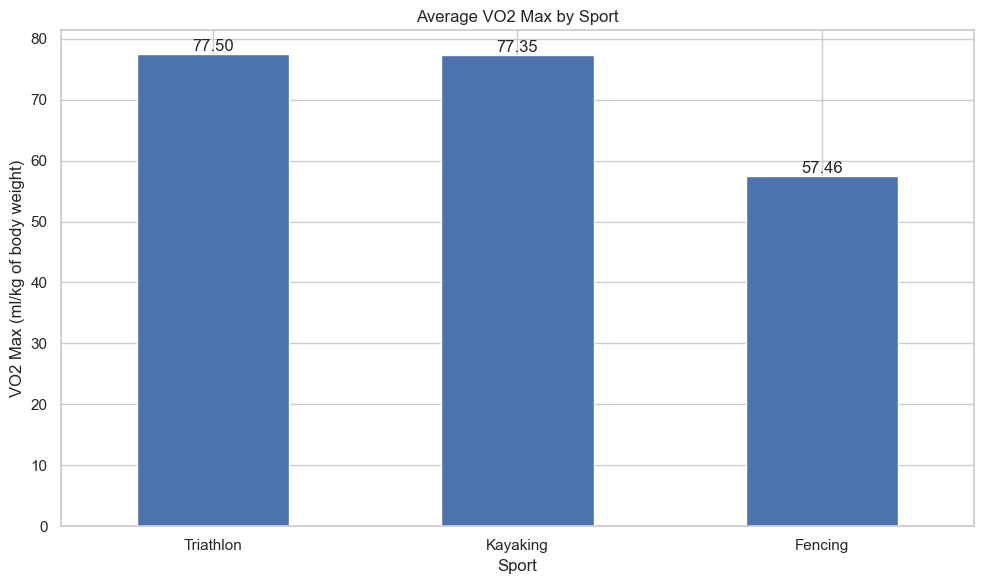

Average VO2 Max by Sport:
Sport
Triathlon    77.499291
Kayaking     77.345233
Fencing      57.460350
Name: VO2_max, dtype: float64


In [223]:
#calculating VO2 max

def calculate_personal_vo2_max(athlete_data, athletes_df):
    # Sum total VO2 for each athlete
    total_vo2 = athlete_data.groupby('ID')['VO2'].sum().reset_index()
    
    # Merging with Athletes dataframe to get weights
    merged_df = total_vo2.merge(athletes_df[['ID', 'Weight']], on='ID')
    
    # Calculating VO2 max (ml/kg of body weight)
    merged_df['VO2_max'] = merged_df['VO2'] / merged_df['Weight']
    
    return merged_df[['ID', 'VO2_max']]

# Calculating VO2 max for each sport
kayaking_vo2max = calculate_personal_vo2_max(Kayaking, Athletes)
triathlon_vo2max = calculate_personal_vo2_max(Triathlon, Athletes)
fencing_vo2max = calculate_personal_vo2_max(Fencing, Athletes)

# Adding sport information
kayaking_vo2max['Sport'] = 'Kayaking'
triathlon_vo2max['Sport'] = 'Triathlon'
fencing_vo2max['Sport'] = 'Fencing'

# Combining VO2 max data for all sports
vo2_max_data = pd.concat([kayaking_vo2max, triathlon_vo2max, fencing_vo2max])

# Calculating average VO2 max by sport
avg_vo2max_by_sport = vo2_max_data.groupby('Sport')['VO2_max'].mean().sort_values(ascending=False)

# Creating bar plot
plt.figure(figsize=(10, 6))
avg_vo2max_by_sport.plot(kind='bar')
plt.title('Average VO2 Max by Sport')
plt.xlabel('Sport')
plt.ylabel('VO2 Max (ml/kg of body weight)')
plt.xticks(rotation=0)

# Adding value labels on top of each bar
for i, v in enumerate(avg_vo2max_by_sport):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Printing the average VO2 max values
print("Average VO2 Max by Sport:")
print(avg_vo2max_by_sport)

Q20:Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend? 


All Athletes HR Averages:
Start: 140.95 bpm
Middle: 143.25 bpm
End: 147.34 bpm


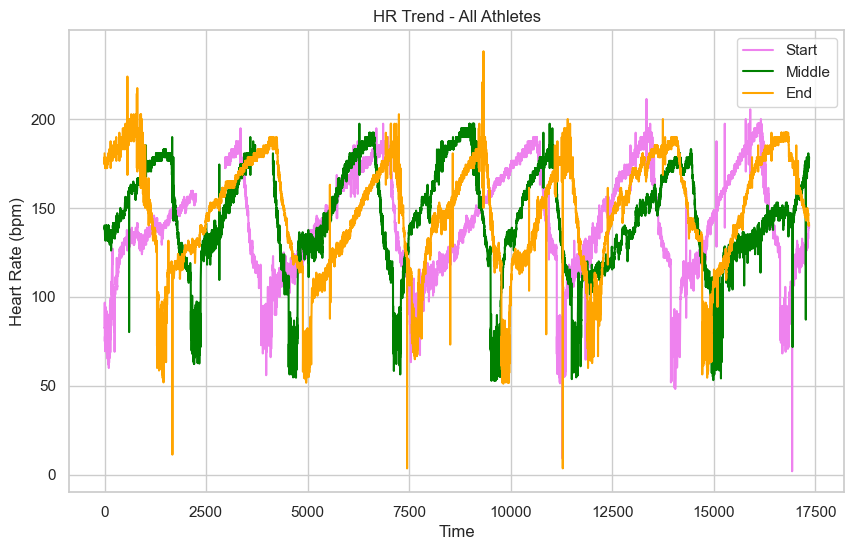

Overall trend for All Athletes: increasing


In [224]:
# merge dataframes
All_Athletes_Data = pd.merge(Kayaking, Triathlon, how='outer').merge(Fencing, how='outer')
df_12 = All_Athletes_Data
df_12['HR'] = 60 / (df_12['RR'] / 1000)  # Make sure you're using df_12, not df_11

#print(df_12)

def analyze_hr_trend(data, sport_name):
    total_rows = len(data)
    start_idx = total_rows // 3
    middle_idx = 2 * total_rows // 3

    # Splitting the data into start, middle, and end segments
    start_segment = data.iloc[:start_idx]
    middle_segment = data.iloc[start_idx:middle_idx]
    end_segment = data.iloc[middle_idx:]
   
    # Calculating average HR for each segment
    avg_hr_start = start_segment['HR'].mean()
    avg_hr_middle = middle_segment['HR'].mean()
    avg_hr_end = end_segment['HR'].mean()
   
    # Displaying the averages
    print(f'\n{sport_name} HR Averages:')
    print(f"Start: {avg_hr_start:.2f} bpm")
    print(f"Middle: {avg_hr_middle:.2f} bpm")
    print(f"End: {avg_hr_end:.2f} bpm")

    # Plotting the trend
    plt.figure(figsize=(10, 6))
    plt.plot(start_segment['HR'].reset_index(drop=True), label='Start', color='violet')
    plt.plot(middle_segment['HR'].reset_index(drop=True), label='Middle', color='green')
    plt.plot(end_segment['HR'].reset_index(drop=True), label='End', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.title(f'HR Trend - {sport_name}')
    plt.legend()
    plt.show()
   
    # Overall trend conclusion
    if avg_hr_start < avg_hr_middle < avg_hr_end:
        trend = "increasing"
    elif avg_hr_start > avg_hr_middle > avg_hr_end:
        trend = "decreasing"
    else:
        trend = "variable"
    print(f"Overall trend for {sport_name}: {trend}")

# Analyze combined data
analyze_hr_trend(df_12, "All Athletes")


Q21:Display a pie chart of number of athletes by sport.

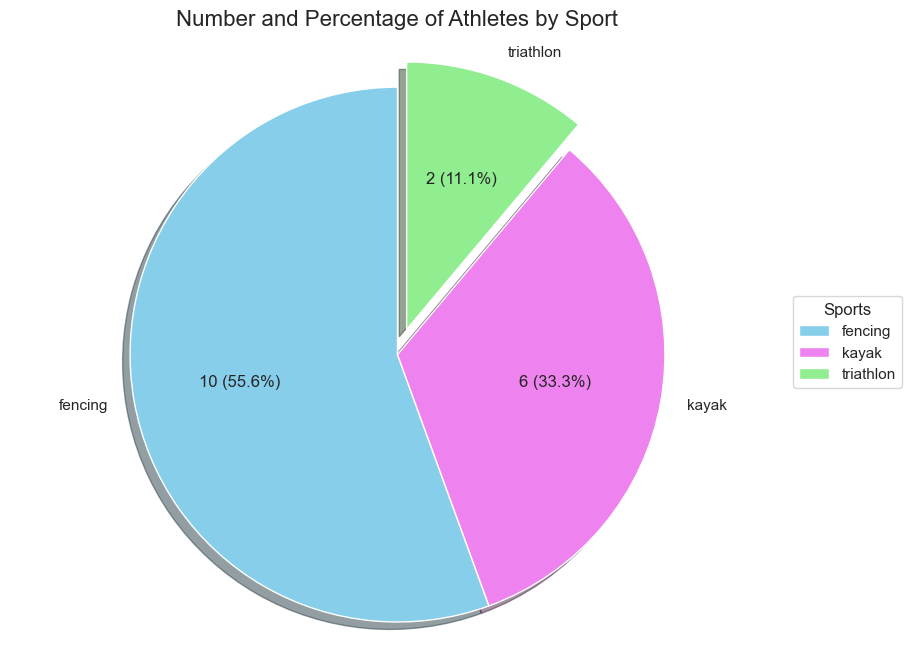

In [225]:
# Counting no. of persons in each sport
Sport_cnt = Athletes['sport'].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))
explode = (0, 0, 0.1)
colors = ['skyblue', 'violet', 'lightgreen']

# here i am defining a function to display both count and percentage
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{val} ({pct:.1f}%)' 
    return my_autopct

ax.pie(Sport_cnt.values, labels=Sport_cnt.index, 
       autopct=make_autopct(Sport_cnt.values), 
       startangle=90, shadow=True, colors=colors, explode=explode)

ax.set_title('Number and Percentage of Athletes by Sport', fontsize=16)
ax.axis('equal')

# Adding a legend
ax.legend(Sport_cnt.index, title="Sports", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Q22:Using any 10 HR values print even if the value is an even number and odd if its an odd number

In [226]:
# Load the Excel file Kayank
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
#creating HR column,
Kayaking['HR']= 60/(Kayaking['RR']/1000)
#roundoff HR to integer value
Kayaking['HR']=Kayaking['HR'].round()
#display (Kayaking)
value_10_HR=Kayaking['HR'].head(10)
#display (value_10_HR)
print('First 10 HR values from Kayank, and checking value is even or odd')
for i, hr in enumerate(value_10_HR, 1):
    if hr == -1:
        print(f"{i}. Invalid HR value")
    elif hr % 2.0 == 0:
        print(f"{i}. {hr} - HR value is even")
    else:
        print(f"{i}. {hr} - HR value is odd")


First 10 HR values from Kayank, and checking value is even or odd
1. 83.0 - HR value is odd
2. 82.0 - HR value is even
3. 83.0 - HR value is odd
4. 90.0 - HR value is even
5. 93.0 - HR value is odd
6. 97.0 - HR value is odd
7. 86.0 - HR value is even
8. 75.0 - HR value is odd
9. 76.0 - HR value is even
10. 78.0 - HR value is even


Q23:Which heart rate zone did most participants spend the longest duration of time in?

In [227]:
#used que-15 code here as in that answer zones are categorized
#df_excersizetype['HR']=60/(df_excersizetype['RR']/1000)
#df_excersizetype
#df_excersizetype.loc[df_excersizetype['HR'] < 100,'Zone Type']='Zone 1'
#df_excersizetype.loc[(df_excersizetype['HR'].between(100,120)), 'Zone Type'] = 'Zone 2'
#df_excersizetype.loc[(df_excersizetype['HR'].between(121,135)), 'Zone Type'] = 'Zone 3'
#df_excersizetype.loc[(df_excersizetype['HR'].between(136,155)), 'Zone Type'] = 'Zone 4'
#df_excersizetype.loc[df_excersizetype['HR'] > 155, 'Zone Type'] = 'Zone 5'
#df_excersizetype

# Group by ID and Zone Type, sum the time
grouped = df_excersizetype.groupby(['ID', 'Zone Type'])['time'].sum().reset_index()

# Find the Zone Type with the longest duration for each participant
max_zone_per_participant = grouped.loc[grouped.groupby('ID')['time'].idxmax()]

#counting participants
zone_counts = max_zone_per_participant['Zone Type'].value_counts()

most_common_zone = zone_counts.index[0]
count_in_most_common_zone = zone_counts.iloc[0]

print('The heart rate zone in which most participants spent the longest duration is:' , most_common_zone)
print('Number of participants who spent the longest time in this zone: ' ,count_in_most_common_zone) 


The heart rate zone in which most participants spent the longest duration is: Zone 5
Number of participants who spent the longest time in this zone:  17


Q24:Store athlete name and sport in a dictionary as a pair of values.

In [228]:
#creating an empty dictionary
athlete_name_sport_dict={}
#iterating through rows, and adding key-value pairs in dict
for athlete_index, row in Athletes.iterrows():
    athlete_fullname= f"{row['First Name']}{row['Last Name']}"
    athlete_name_sport_dict[athlete_fullname]=row['sport']
print('Athlete name and sport dictionary is')
print(athlete_name_sport_dict)


Athlete name and sport dictionary is
{'OliviaMartinez': 'fencing', 'EthanReynolds': 'fencing', 'JacksonHarper': 'fencing', 'LiamSanchez': 'fencing', 'AvaThompson': 'fencing', 'SophiaRodriguez': 'fencing', 'GraceSimmons': 'fencing', 'AidenBennett': 'fencing', 'ChloePrice': 'fencing', 'LilyJordan': 'fencing', 'IsabellaGriffin': 'kayak', 'CalebDixon': 'kayak', 'MiaCarpenter': 'kayak', 'HarperMitchell': 'kayak', 'MasonWallace': 'kayak', 'LoganAnderson': 'kayak', 'LucasFoster': 'triathlon', 'OwenMyers': 'triathlon'}


Q25:Using arrays and loops, find the count of athletes based on gender.

In [229]:
#first created an array
athlete_gender_array=np.array(Athletes['Gender'])
male_athlete_count=0
female_athlete_count=0
#using loop
for gender in athlete_gender_array:
    if gender == 'Male':
        male_athlete_count = male_athlete_count+1
    elif gender == 'Female':
        female_athlete_count = female_athlete_count+1
print('Number of Male athletes is', male_athlete_count)
print('Number of Female athletes is', female_athlete_count)

Number of Male athletes is 8
Number of Female athletes is 10


Q26:Create a sankey diagram to show the groups of race within each sport

In [230]:
import plotly.graph_objects as go
import pandas as pd
import random
import plotly.io as pio
pio.renderers.default = "notebook"
#Grouping by Ethnicity and Sport to get the counts
ethnicity_sport_counts = Athletes.groupby(['Ethnicity', 'sport']).size().reset_index(name='count')

# Creating lists for sources, targets, and values
source = ethnicity_sport_counts['Ethnicity'].tolist()
target = ethnicity_sport_counts['sport'].tolist()
values = ethnicity_sport_counts['count'].tolist()

#Creating a list of all unique nodes (Ethnicity + Sport)
all_nodes = list(set(source + target))

#Mapping the nodes to indices
source_indices = [all_nodes.index(s) for s in source]
target_indices = [all_nodes.index(t) for t in target]

# Generating the colors for nodes and links
def generate_color():
    return f'rgb({random.randint(10,255)}, {random.randint(10,255)}, {random.randint(10,255)})'
#for colors
node_colors = [generate_color() for _ in all_nodes]
link_colors = [generate_color() for _ in values]

#creating the Sankey diagram
sankey = go.Sankey(
    node = {
        'pad': 15,
        'thickness': 20,
        'line': {'color': 'black', 'width': 0.5},
        'label': all_nodes,
        'color': node_colors  
    },
    link = {
        'source': source_indices,
        'target': target_indices,
        'value': values,
        'color': link_colors 
    }
)

# Creating the figure, layout
fig = go.Figure(data=[sankey])
fig.update_layout(title_text="Ethnic Groups within Each Sport", font_size=10)
fig.show()

#sometimes dig isnt displayed in github then import plotly.io as pio
#fig.write_image("sankey_diagram.png")

#sometimes sankey graphs arent displayed properly in some versions of jupiter notebook(i personally had this experience) github, so stored as an image, 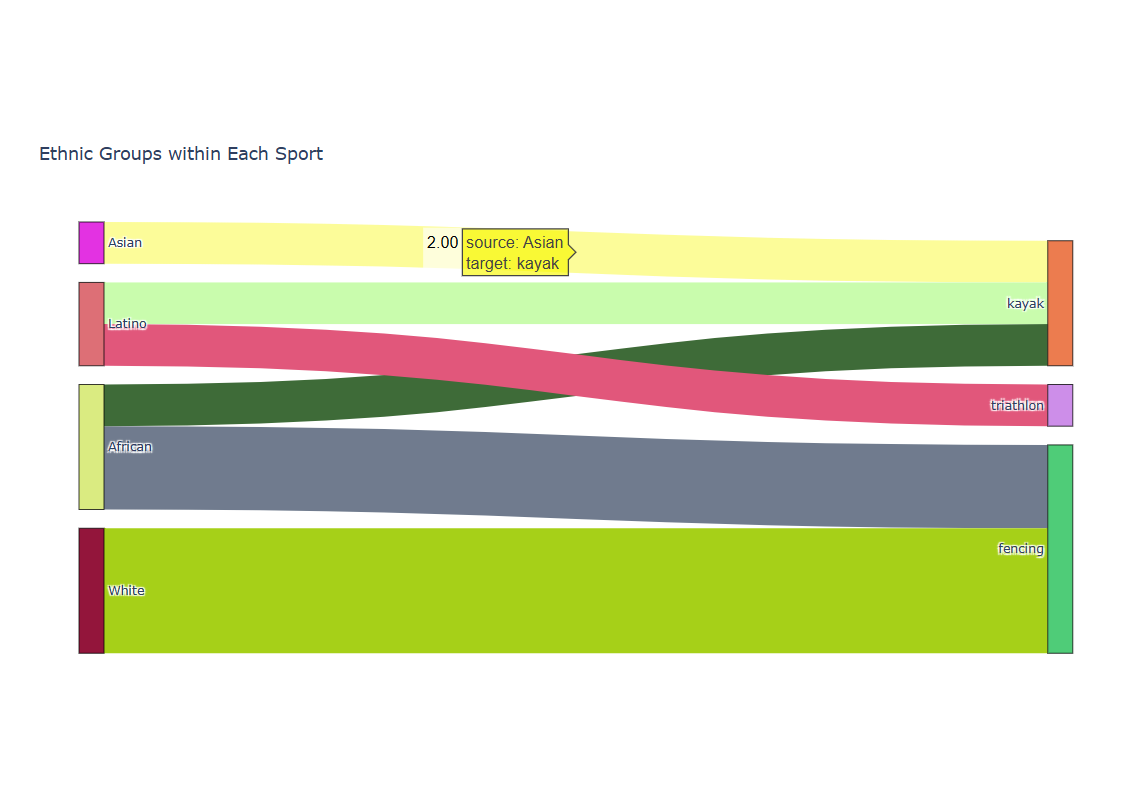 and kept for display.but if one runs the code, this will run.

Q27:Calculate the average heart rate for every minute for every athlete and add it as a column in the same dataframe.

In [231]:
df_11=AllAthletesData.copy(deep=True)
#display(df_11)
#print(df_11.columns)
df_11['HR']= 60/(df_11['RR']/1000)
df_11['min']=(df_11['time']//60)
df_HR_Avg=df_11.groupby(['ID', 'min'])['HR'].mean().reset_index(name='HR_Avg')
#df_HR_Avg
df_11 = df_11.merge(df_HR_Avg, on=['ID', 'min'], how='left')
print('Below is the dataframe with Average HR for every athlete is :')
print(df_11)
#Print only the rows where ID is 1
#print(df_11[df_11['ID'] == '1'])

Below is the dataframe with Average HR for every athlete is :
       ID     time     RR       VO2  power          HR   min      HR_Avg
0      11 -168.600  727.0  0.287147      0   82.530949  -3.0   81.100771
1      11 -167.872  728.0  0.287147      0   82.417582  -3.0   81.100771
2      11 -167.148  724.0  0.287147      0   82.872928  -3.0   81.100771
3      11 -166.484  664.0  0.320580      0   90.361446  -3.0   81.100771
4      11 -165.836  648.0  0.320580      0   92.592593  -3.0   81.100771
...    ..      ...    ...       ...    ...         ...   ...         ...
52057  10  942.700  428.0  0.786363      0  140.186916  15.0  145.592311
52058  10  943.124  424.0  0.786363      0  141.509434  15.0  145.592311
52059  10  943.552  428.0  0.786363      0  140.186916  15.0  145.592311
52060  10  943.976  424.0  0.786363      0  141.509434  15.0  145.592311
52061  10  944.404  428.0  0.786363      0  140.186916  15.0  145.592311

[52062 rows x 8 columns]


Q28:Print athlete 15s Age and Pvt1 using the format() function

In [232]:
#Selecting Athlete with ID 15,
Athlete_15=Athletes[Athletes['ID'] == 15].iloc[0]
age=Athlete_15['age']
Pvt1=Athlete_15['P_vt1']
print('The Age and Pvt1 of Athlete with ID 15 is age: {}, Pvt1 : {}'. format(age,Pvt1) )

The Age and Pvt1 of Athlete with ID 15 is age: 13, Pvt1 : 125


Q29:On average how long was each participants’ warm up?

In [233]:
#taken df_excersize from question no1 and q2 which was Join all sport-related tables to produce one dataframe 
#that has all athletes values. The final table has 5 columns: ID, time,power,RR, vo2, power. 
#and Divide the rows into 3 parts: Warm up(when time<0), GET(graded exercise test) and cool down using the data defLabel each row accordingly
#display(df_excersizetype)
DFR = df_excersizetype[df_excersizetype['ExType'] == 'Warm Up']
DFR = DFR[['ID', 'time']]
#print(DFR)
print('On average each participant warm up time is')
DFR.groupby(['ID', 'time']).sum().reset_index().groupby('ID').mean().round(3) 

On average each participant warm up time is


time
ID         
1   -65.860
2  -109.490
3   -87.784
4   -91.477
5   -89.421
6   -91.168
7   -88.607
8   -91.156
9  -101.813
10  -90.967
11  -80.039
12  -90.950
13  -92.682
14  -79.088
15  -90.926
16  -83.039
17  -91.516
18  -91.943

Q30:Display the HRV of each athlete?

In [234]:
# Merging the datasets
AllAthletesData1 = pd.merge(Kayaking, Triathlon, how='outer').merge(Fencing, how='outer')
#display(AllAthletesData1)

# Initiating a dictionary 
athlete_hrv = {}

# Calculating RR diff and groupby ID
AllAthletesData1['RR_diff'] = AllAthletesData1.groupby('ID')['RR'].diff()
group_ID = AllAthletesData1.groupby('ID')

# Looping and iterating
for Athlete_ID, Athlete_data in group_ID:
    HRV = np.std(Athlete_data['RR_diff'].dropna())
    athlete_hrv[Athlete_ID] = HRV

# Displaying the HRV of each athlete
print("HRV for each athlete:")
for athlete_id, hrv_value in athlete_hrv.items():
    print(f"Athlete ID: {athlete_id}, HRV: {hrv_value:.2f}")


HRV for each athlete:
Athlete ID: 1, HRV: 25.84
Athlete ID: 2, HRV: 40.72
Athlete ID: 3, HRV: 20.40
Athlete ID: 4, HRV: 33.33
Athlete ID: 5, HRV: 115.30
Athlete ID: 6, HRV: 447.29
Athlete ID: 7, HRV: 23.69
Athlete ID: 8, HRV: 504.36
Athlete ID: 9, HRV: 22.54
Athlete ID: 10, HRV: 26.86
Athlete ID: 11, HRV: 13.42
Athlete ID: 12, HRV: 12.28
Athlete ID: 13, HRV: 12.44
Athlete ID: 14, HRV: 162.04
Athlete ID: 15, HRV: 28.80
Athlete ID: 16, HRV: 794.69
Athlete ID: 17, HRV: 28.07
Athlete ID: 18, HRV: 30.50


Q31:Return the count of athletes for any sport that the user inputs.

In [235]:
#Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
user_input=input('Enter the sport name:')
#converting the user input into lower case, in case if it is case sensitive
user_input=user_input.lower()
#checking if sport exists in dataframe, that too case-sensitive
if user_input in Athletes['sport'].str.lower().unique():
    count=Athletes[Athletes['sport'].str.lower() == user_input].shape[0]
    print('The count of athletes is', count)
else:
    print('The given input is not a valid sport in given dataset')
   

Enter the sport name:fencing
The count of athletes is 10


Q32:Insert the name of every athlete into an array and display the length of that array.

In [236]:
Athletes['full name'] = Athletes['First Name'] + ' ' + Athletes['Last Name']
# Creating a NumPy array of athlete names
Athlete_name = np.array(Athletes['full name'])
# Displaying array
print("Array of athlete names:", Athlete_name)
print('The length of array (total number of athletes) is:', len(Athlete_name))

Array of athlete names: ['Olivia Martinez' 'Ethan Reynolds' 'Jackson Harper' 'Liam Sanchez'
 'Ava Thompson' 'Sophia Rodriguez' 'Grace Simmons' 'Aiden Bennett'
 'Chloe Price' 'Lily Jordan' 'Isabella Griffin' 'Caleb Dixon'
 'Mia Carpenter' 'Harper Mitchell' 'Mason Wallace' 'Logan Anderson'
 'Lucas Foster' 'Owen Myers']
The length of array (total number of athletes) is: 18


Q33: Create a list and a tuple. Print the types and lengths of  both.

In [237]:
# Getting athletes ID and full name from the VO2Max_Combined as lists and tuples 
Athletes_list = Athletes['ID'].tolist()
Athletes_tuple = tuple(Athletes['First Name'] + " " + Athletes['Last Name'])

# Printing out the values, types and lengths of both of the list and tuples
print("\nAthletes List:\t", Athletes_list)
print("\nType :\t", type(Athletes_list))
print("\nLength :\t", len(Athletes_list))

print("\nAthletes tuple:\t",Athletes_tuple)
print("\nType :\t", type(Athletes_tuple))
print("\nLength :\t", len(Athletes_tuple))


Athletes List:	 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

Type :	 <class 'list'>

Length :	 18

Athletes tuple:	 ('Olivia Martinez', 'Ethan Reynolds', 'Jackson Harper', 'Liam Sanchez', 'Ava Thompson', 'Sophia Rodriguez', 'Grace Simmons', 'Aiden Bennett', 'Chloe Price', 'Lily Jordan', 'Isabella Griffin', 'Caleb Dixon', 'Mia Carpenter', 'Harper Mitchell', 'Mason Wallace', 'Logan Anderson', 'Lucas Foster', 'Owen Myers')

Type :	 <class 'tuple'>

Length :	 18


Q34: Display a word cloud using any values in the dataset

In [298]:


# getting the sport being played by the most of the athletes
data_Combined = ' '.join(Athletes['sport'])

#passing arguments and attributes and plotting a chart
word_Cloud = WordCloud(width=800, height=400, background_color='black').generate(data_Combined)
plt.figure(figsize=(10, 5))
plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

Q35: Create a Regression Plot on Max V02 and mean BMI for any sport of your choice

ID        VO2  Weight        BMI
0   1  42.807730    53.7  20.716793
1   2  38.632602    56.2  21.414419
2   3  69.705657    89.9  24.642965
3   4  76.989878    76.5  23.611111
4   5  86.742579    76.4  22.083478
5   6  71.679465    65.6  22.968383
6   7  38.403988    49.8  18.292011
7   8  44.822092    51.2  18.806244
8   9  49.697342    57.1  18.433626
9  10  55.122171    58.8  18.768553

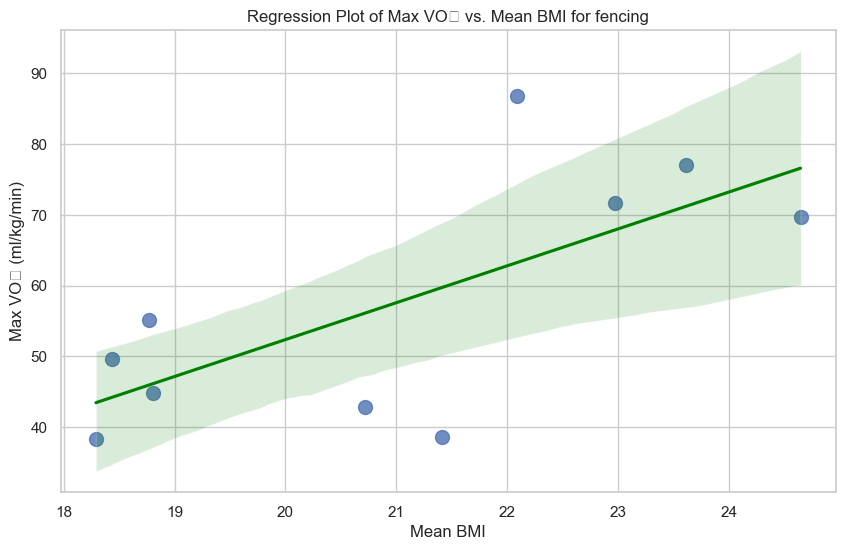

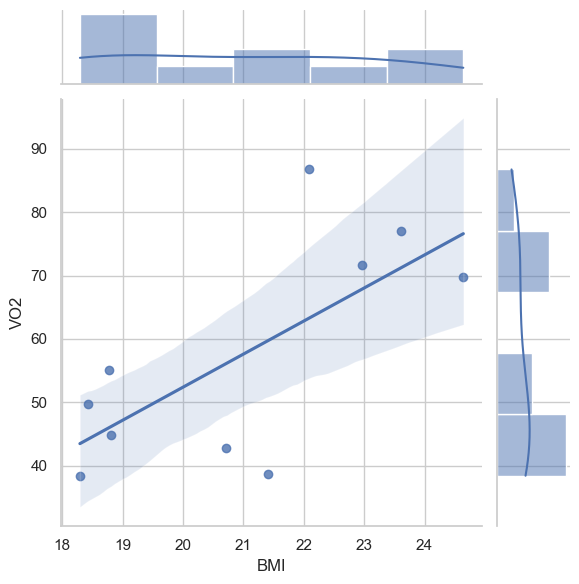

In [239]:
# BMI is calculated with weight/heightinmeters**2
#Athletes['BMI']=Athletes['Weight']/(Athletes['Height']/100)**2

# fencing sport data is retrieved from dataset
fencing_Athletes = Athletes[Athletes['sport'] == 'fencing']
athlete_Data = fencing_Athletes[['ID','Weight', 'BMI']]

max_VO2_Data=AllAthletesData[['ID','VO2']].groupby(by='ID').sum().reset_index()
max_VO2_Data=max_VO2_Data.merge(athlete_Data,on='ID')
max_VO2_Data['VO2'] /= max_VO2_Data['Weight']

display(max_VO2_Data)

sns.set(style="whitegrid")

#passing arguments and attributes for regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='BMI', y='VO2', data=max_VO2_Data, scatter_kws={'s':100}, line_kws={'color':'green'})

#---------Solution 1
# Adding labels and title
plt.xlabel('Mean BMI')
plt.ylabel('Max VO₂ (ml/kg/min)')
plt.title('Regression Plot of Max VO₂ vs. Mean BMI for fencing')
plt.show()

#---------Solution 2
#Showing jointplot for the comparison
sns.jointplot(x="BMI", y="VO2", data=max_VO2_Data, kind="reg");

Q36: Plot the time series of HR( every 5 mins) of athlete 1

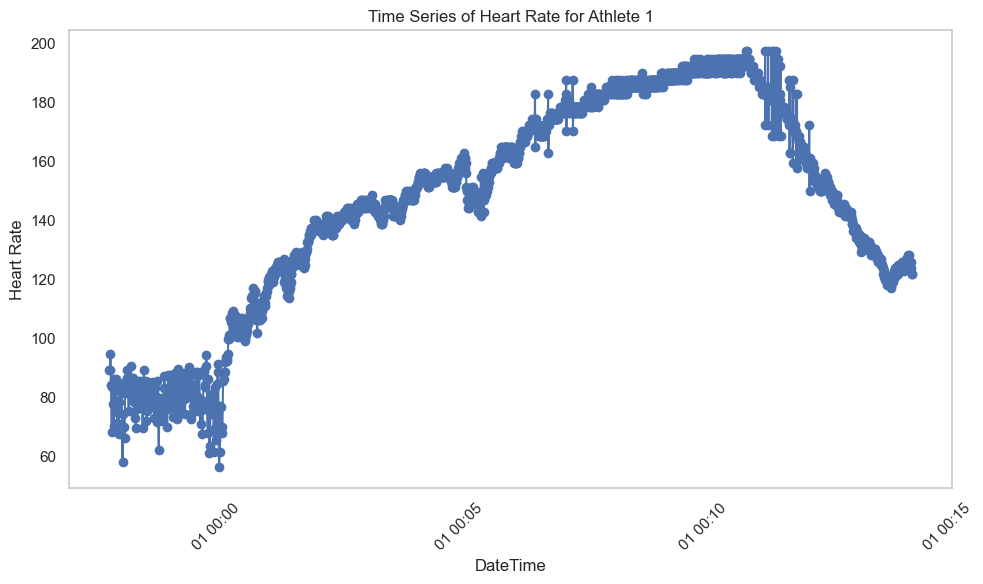

In [240]:

# Sample data 
athlete_data= AllAthletesData[AllAthletesData['ID'] == 1].copy()
athlete_data['HeartRate'] = 60 * 1000 / athlete_data['RR']
# converting time to date time 
athlete_data['timestamp'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(athlete_data['time'], unit='s')

# Setting timestamp as index 
athlete_data.set_index('timestamp', inplace=True)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(athlete_data.index, athlete_data['HeartRate'], marker='o', linestyle='-', color='b')
plt.title('Time Series of Heart Rate for Athlete 1')
plt.xlabel('DateTime')
plt.ylabel('Heart Rate')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q37: What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.

In [241]:
max_Power_Data = AllAthletesData[['ID','power']]
max_Power_Data = max_Power_Data.merge(Athletes,on='ID')

max_Power = max_Power_Data['power'].max()

res = max_Power_Data[max_Power_Data['power'] == max_Power].drop_duplicates(subset = ['ID'])


print("Name of the participant: " + res['First Name'].to_string(index=False) + " " + res['Last Name'].to_string(index=False))
print(f"\nSport played by participant : {res['sport'].to_string(index=False)}  ")
print(f"\nMaximum power in watts : {res['power'].to_string(index=False)}  ")


Name of the participant: Isabella Griffin

Sport played by participant : kayak  

Maximum power in watts : 335  


Q38: What is the average  difference in IBI during the warm up Vs the actual test?

In [242]:

avg_IBI = df_excersizetype.groupby('ExType')['RR'].mean()
#print(avg_IBI)
diff_IBI = avg_IBI['GET'] - avg_IBI['Warm Up']

print(f"\nThe average IBI difference b/w warm up and actual test is : {diff_IBI:.2f} milliseconds")



The average IBI difference b/w warm up and actual test is : -357.62 milliseconds


Q39: Print out what's in indexes 7, 10, and 3 for the array. [1, 2, 3, 4, 5,6,7,8,9,10]

In [243]:
int_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Array index starts from 0 and ends at 9.Trying to print unaccessable index will cause index error 
try:
    print(int_array[7]) 
    print(int_array[10]) 
    print(int_array[3])  #will not get printed since error occured in previous step
except IndexError as e:
    print(f"We cannot access this index because {e}")



8
We cannot access this index because list index out of range


Q40:   [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  Use array slicing to display elements 1,3,5. If the value is less than 4 display it as 99

In [244]:
given_arr =np.array([[1, 2, 3, 4, 5],[6, 7, 8, 9, 10],[11, 12, 13, 14, 15],[16, 17, 18, 19, 20],[21, 22, 23, 24, 25],[26, 27, 28, 29, 30]])
print("\nOriginal array:\n")
print(given_arr)   

sliced_arr = given_arr[0:1:,0:5:2]
print(f"\nSliced array:\t {sliced_arr}")

#If the value is less than 4 display it as 99
sliced_arr[sliced_arr < 4]=99
print(f"\nFinal output:\t {sliced_arr}")



Original array:

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]

Sliced array:	 [[1 3 5]]

Final output:	 [[99 99  5]]


Q41: What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.

In [245]:

low_Power_Data = df_excersizetype[['ID','ExType','power']]
low_Power_Data = low_Power_Data[low_Power_Data['ExType'] == 'GET'].groupby(by='ID').min().reset_index()
low_Power_Data = low_Power_Data.merge(Athletes,on='ID')
display(low_Power_Data[['First Name', 'Last Name', 'sport', 'power']])


First Name  Last Name      sport  power
0      Olivia   Martinez    fencing     50
1       Ethan   Reynolds    fencing     50
2     Jackson     Harper    fencing     50
3        Liam    Sanchez    fencing     50
4         Ava   Thompson    fencing     50
5      Sophia  Rodriguez    fencing     50
6       Grace    Simmons    fencing     50
7       Aiden    Bennett    fencing     50
8       Chloe      Price    fencing     50
9        Lily     Jordan    fencing     50
10   Isabella    Griffin      kayak     50
11      Caleb      Dixon      kayak     50
12        Mia  Carpenter      kayak     50
13     Harper   Mitchell      kayak     50
14      Mason    Wallace      kayak     50
15      Logan   Anderson      kayak     50
16      Lucas     Foster  triathlon     50
17       Owen      Myers  triathlon     50

Q42: What was the difference in heart rate between warm up and GET for athlete 1

In [246]:
# calculating HR
df_excersizetype['HeartRate'] = 60 * 1000 / df_excersizetype['RR']

athlete_id = 1  
HR_Data = df_excersizetype[df_excersizetype['ID'] == athlete_id]

warmup = HR_Data[HR_Data['ExType'] == 'Warm Up']  
GET = HR_Data[HR_Data['ExType'] == 'GET'] 

warmup_AVG = warmup['HeartRate'].mean()
GET_AVG = GET['HeartRate'].mean()

diff_heart_rate = GET_AVG - warmup_AVG
print(f"\nThe difference in heart rate b/w warm up and GET fot athlete 1 is  {diff_heart_rate:.2f}")


The difference in heart rate b/w warm up and GET fot athlete 1 is  82.49


Q43: Create a pivot table that shows count of patients within each age group and sport

In [247]:
# putting age range into bins for easy understanding
bins = [0, 12, 14, 16, 18, 100] 
labels = ['0-12', '13-14', '15-16', '17-18', '19+'] 

Athletes['age_range'] = pd.cut(Athletes['age'], bins=bins, labels=labels, right=True)
piv_data = pd.pivot_table(Athletes, index='age_range', columns='sport',values='ID',aggfunc='count',observed=False)

print("\nNumber of athletes in each age group and sport:\n")
print(piv_data)


Number of athletes in each age group and sport:

sport      fencing  kayak  triathlon
age_range                           
0-12             0      0          2
13-14            2      2          0
15-16            6      1          0
17-18            2      3          0
19+              0      0          0


Q44: Display a  distrubution chart of MAX V02 for all athletes

    ID        VO2  Weight
0    1  42.807730    53.7
1    2  38.632602    56.2
2    3  69.705657    89.9
3    4  76.989878    76.5
4    5  86.742579    76.4
5    6  71.679465    65.6
6    7  38.403988    49.8
7    8  44.822092    51.2
8    9  49.697342    57.1
9   10  55.122171    58.8
10  11  89.586903    84.8
11  12  92.258212    86.0
12  13  90.758693    83.9
13  14  54.869902    62.3
14  15  66.936066    63.5
15  16  69.661622    70.4
16  17  73.789806    39.9
17  18  81.208775    39.7


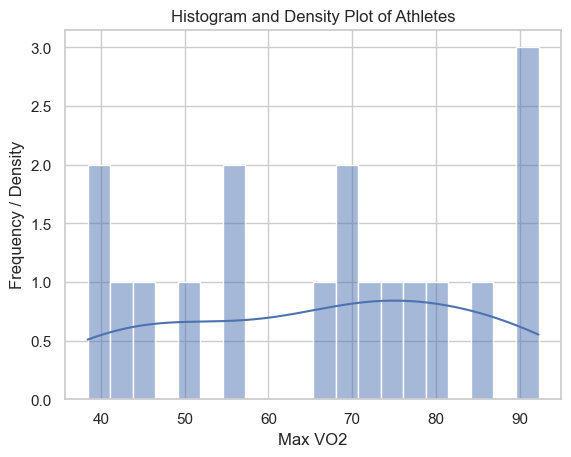

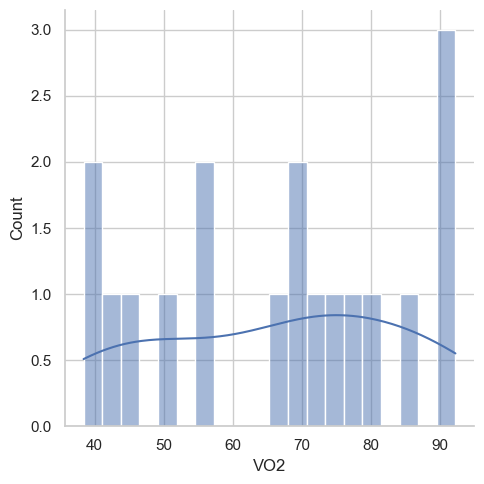

In [248]:

athlete_Data_Dist = Athletes[['ID','Weight']]

max_VO2_Data_All=AllAthletesData[['ID','VO2']].groupby(by='ID').sum().reset_index()
max_VO2_Data_All=max_VO2_Data_All.merge(athlete_Data_Dist,on='ID')
max_VO2_Data_All['VO2'] /= max_VO2_Data_All['Weight']

print(max_VO2_Data_All)

sns.histplot(max_VO2_Data_All['VO2'], kde=True, bins=20)
plt.xlabel('Max VO2')
plt.ylabel('Frequency / Density')
plt.title('Histogram and Density Plot of Athletes')
plt.show()

sns.displot(max_VO2_Data_All['VO2'],kde=True,bins=20,element='bars')
plt.show()

Q45: Create a dummy array with no data with a size of 15.

In [249]:
# Type1
# create empty object array and print
empty_obj_array1 = np.empty(15, dtype=object)
empty_obj_array2 = np.empty(15)
print(f"\nDummy Array with object type :\t {empty_obj_array1}")
print(f"\nDummy Array with any type :\t {empty_obj_array2}")

# Type2 2D Array
# create empty array 
empty_array = np.array([[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]])
# checking if its empty
print(f"\nDummy 2D Array with empty subsets :\t {empty_array}")
#print(np.any(empty_array))
print(f"\nLength of array :\t{len(empty_array)}")



Dummy Array with object type :	 [None None None None None None None None None None None None None None
 None]

Dummy Array with any type :	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Dummy 2D Array with empty subsets :	 []

Length of array :	15


Q46: How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

In [250]:
athlete_id_min = 15  
athlete_VO2_data = df_excersizetype[df_excersizetype['ID'] == athlete_id_min] 
athlete_VO2_data = athlete_VO2_data[athlete_VO2_data['ExType'] == 'GET']
athlete_VO2_data=athlete_VO2_data.merge(athlete_Data_Dist,on='ID')

sum_time = athlete_VO2_data['VO2'].sum()
sum_VO2 = athlete_VO2_data['VO2'].sum()
weight = athlete_Data_Dist.loc[athlete_Data_Dist['ID'] == athlete_id_min, 'Weight']

x_time = sum_time/60
x_VO2 = sum_VO2/weight

print(f"\nThe 15th participant's exercise lasted for {x_time:.2f} minutes." )
print(f"\nTotal VO2 Max consumed during the test:\t {x_VO2.to_string(index=False)}ml/kg/min .")


The 15th participant's exercise lasted for 59.95 minutes.

Total VO2 Max consumed during the test:	 56.642665ml/kg/min .


Q47: Convert ' sport' into a numeric field through Label encoding

In [251]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

print("\nBefore encoding :")
#print(Athletes[['ID','First Name','Last Name','sport']])
print(Athletes['sport'].unique())
Athletes['sport_encoded'] = LabelEncoder().fit_transform(Athletes['sport'])
print("\nAfter encoding :")
print(Athletes['sport_encoded'].unique())
print(Athletes[['ID','First Name','Last Name','sport','sport_encoded']])



Before encoding :
['fencing' 'kayak' 'triathlon']

After encoding :
[0 1 2]
    ID First Name  Last Name      sport  sport_encoded
0    1     Olivia   Martinez    fencing              0
1    2      Ethan   Reynolds    fencing              0
2    3    Jackson     Harper    fencing              0
3    4       Liam    Sanchez    fencing              0
4    5        Ava   Thompson    fencing              0
5    6     Sophia  Rodriguez    fencing              0
6    7      Grace    Simmons    fencing              0
7    8      Aiden    Bennett    fencing              0
8    9      Chloe      Price    fencing              0
9   10       Lily     Jordan    fencing              0
10  11   Isabella    Griffin      kayak              1
11  12      Caleb      Dixon      kayak              1
12  13        Mia  Carpenter      kayak              1
13  14     Harper   Mitchell      kayak              1
14  15      Mason    Wallace      kayak              1
15  16      Logan   Anderson      kayak    

Q48: What was the average age of the athletes?


In [252]:
average_Age =Athletes['age'].mean()
#print(round(average_Age,2))
print(f"\nAverage age of the Athletes: {average_Age:.2f}")


Average age of the Athletes: 15.22


Q49: Retrieve the row with minimum IBI for fencing athletes using sorting technique.

In [253]:
#this dataframe is used for further analysis
dataframe=pd.concat([Kayaking,Triathlon,Fencing])
#dataframe
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Fencing_df=Fencing.sort_values('RR')
min_ibirow=round(Fencing_df.iloc[0],2)
print(min_ibirow)

ID         7.00
time     596.37
RR       252.00
VO2        1.29
power    155.00
Name: 19582, dtype: float64


Q50 Create a violin chart using any 2 columns in the dataset

<Axes: xlabel='Gender', ylabel='age'>

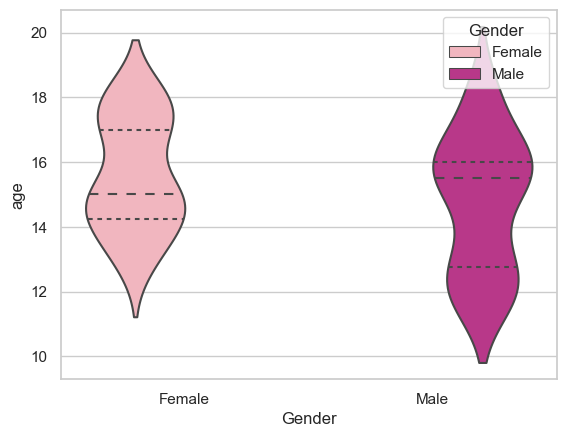

In [254]:
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
sns.violinplot(x='Gender',y='age',data= Athletes,inner='quartile',bw=0.5,hue='Gender',palette='RdPu')


Q51 List every athlete’s V02 ml/kg

In [255]:
AllAthletes=pd.read_excel("AllAthletesData.xlsx")
#Athletes.head()
df_VO2=AllAthletes[['ID','VO2']].groupby(by='ID').sum().reset_index()
df_VO2=df_VO2.merge(Athletes[['ID','First Name','Last Name','Weight','Height']],on='ID')
df_VO2['VO2'] /= df_VO2['Weight']
for index, data in df_VO2.iterrows():
    print(f"{data['Last Name']},{data['First Name']} has {round(data['VO2'],2)} VO2 ml/kg")

Martinez,Olivia has 42.81 VO2 ml/kg
Reynolds,Ethan has 38.63 VO2 ml/kg
Harper,Jackson has 69.71 VO2 ml/kg
Sanchez,Liam has 76.99 VO2 ml/kg
Thompson,Ava has 86.74 VO2 ml/kg
Rodriguez,Sophia has 71.68 VO2 ml/kg
Simmons,Grace has 38.4 VO2 ml/kg
Bennett,Aiden has 44.82 VO2 ml/kg
Price,Chloe has 49.7 VO2 ml/kg
Jordan,Lily has 55.12 VO2 ml/kg
Griffin,Isabella has 89.59 VO2 ml/kg
Dixon,Caleb has 92.26 VO2 ml/kg
Carpenter,Mia has 90.76 VO2 ml/kg
Mitchell,Harper has 54.87 VO2 ml/kg
Wallace,Mason has 66.94 VO2 ml/kg
Anderson,Logan has 69.66 VO2 ml/kg
Foster,Lucas has 73.79 VO2 ml/kg
Myers,Owen has 81.21 VO2 ml/kg


Q52 Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

In [256]:
#Higher VO2 max
df_VO2['BMI'] = df_VO2['Weight']/((df_VO2['Height']/100)**2)
df_fit = df_VO2[(df_VO2['BMI']<25) & (df_VO2['BMI']>19)]
id = df_fit['VO2'].idxmax()
print(f"The fittest athlete is {df_fit['Last Name'][id]}, {df_fit['First Name'][id]} as her BMI is in the fit Range and her VO2 ml/kg is the highest")


The fittest athlete is Thompson, Ava as her BMI is in the fit Range and her VO2 ml/kg is the highest


Q53 phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill

In [257]:
phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}
Jill_phno=phonebook["Jill"]
print("Jill's phone number is",Jill_phno)


Jill's phone number is 947662781


Q54 Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID

<Figure size 800x800 with 0 Axes>

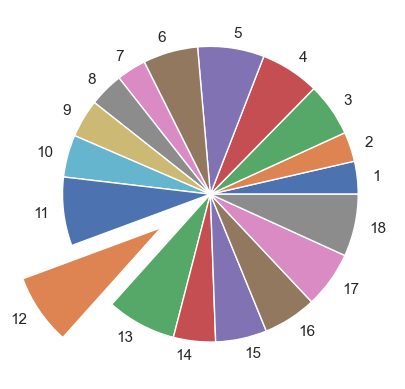

In [258]:
plt.figure(figsize=(8,8))
fig, ax = plt.subplots()
explode = df_VO2['VO2'].apply(lambda x: 0.4 if x==max(df_VO2['VO2']) else 0)
ax.pie(df_VO2['VO2'], labels=df_VO2.ID, explode=explode)
plt.show()

Q55 Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate

In [259]:
Triathlon['HR'] = 60/(Triathlon['RR']/100)
id = Triathlon['ID'][Triathlon['HR'].idxmax()]
Athletes[Athletes['ID']==id]

ID  age  Weight  Height  P_vt1  P_vt2      sport Gender Ethnicity  \
17  18   12    39.7     158     65    168  triathlon   Male    Latino   

   First Name Last Name  
17       Owen     Myers

Q56 Display a histogram to show distribution of athletes by sport.

Text(0, 0.5, 'Frequency')

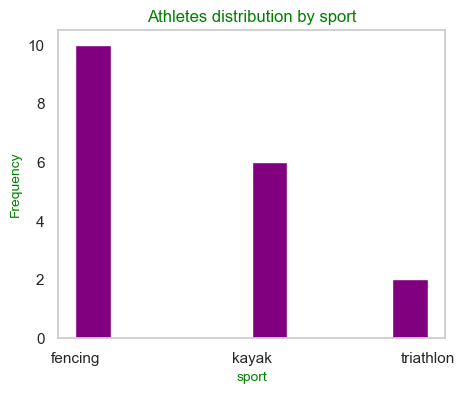

In [260]:
plt.figure(figsize=(5,4))
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
Athletes['sport'].hist(color='purple',grid= False)

#add labels and title
plt.title('Athletes distribution by sport',fontsize=12,color='green')
plt.xlabel('sport',fontsize=10,color='green')
plt.ylabel('Frequency',fontsize=10,color='green')


Q57 get the first letter of last name of students using for loops and RegEX

In [261]:
import re
for i in Athletes['Last Name']:
    print(re.search('^.',i).group())
    

M
R
H
S
T
R
S
B
P
J
G
D
C
M
W
A
F
M


Q58 What is the average % difference in heart rate between warm up and GET for all athletes?

In [262]:
dataframe['HR']=60/(dataframe['RR']/100)
df_warmup = dataframe[dataframe['time']<0]
df_get = dataframe[dataframe['time']>0]
df_get = df_get[df_get['power']!=0]
hr_warmup = df_warmup['HR'].mean()
hr_get = df_get['HR'].mean()
avg_pct_dif = 200*(hr_get-hr_warmup)/(hr_warmup+hr_get)
print('The average % difference in heart rate between warm up and GET for all athletes is:',round(avg_pct_dif,2))

The average % difference in heart rate between warm up and GET for all athletes is: 61.06


Q59 Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

In [263]:
tallest_athlete= Athletes.iloc[Athletes['Height'].idxmax()]
print(f"""{tallest_athlete['Last Name']},{tallest_athlete['First Name']} is the tallest Athlete.
His sport is {tallest_athlete['sport']} and his VO2 ml/kg is {round(df_VO2[df_VO2['ID']==tallest_athlete['ID']]['VO2'].values[0])}""")

Harper,Jackson is the tallest Athlete.
His sport is fencing and his VO2 ml/kg is 70


Q60 get the last letter      of athletes last names using RegEX

In [264]:
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
text_column=Athletes['Last Name']
last_letter= text_column.str.extract(r'(\w)$')
print(last_letter)

    0
0   z
1   s
2   r
3   z
4   n
5   z
6   s
7   t
8   e
9   n
10  n
11  n
12  r
13  l
14  e
15  n
16  r
17  s


Q61 Reverse an arrays order in Python. You can use any array with any values you like.

In [265]:
#Define a simple array
arr=[11,12,13,14,15,16,17,18]
#Reverse the array
Rev_arr=arr[::-1]
print(Rev_arr)

[18, 17, 16, 15, 14, 13, 12, 11]


Q62 What is the root mean of successive differences for 30 consecutive minutes for each athlete.

In [266]:

kayaking_df = pd.read_excel("V02Max_Combined.xlsx", sheet_name="Kayaking")
triathlon_df = pd.read_excel("V02Max_Combined.xlsx", sheet_name="Triathlon")
fencing_df = pd.read_excel("V02Max_Combined.xlsx", sheet_name="Fencing")
athletes_df = pd.read_excel("V02Max_Combined.xlsx", sheet_name="Athletes")
kayaking_df['Sport'] = 'Kayaking'
triathlon_df['Sport'] = 'Triathlon'
fencing_df['Sport'] = 'Fencing'
combined_df = pd.concat([kayaking_df, triathlon_df, fencing_df], ignore_index=True)
combined_df['time'] = pd.to_datetime(combined_df['time'], errors='coerce')
combined_df = combined_df.sort_values(['ID', 'time'])
combined_df['RR'] = pd.to_numeric(combined_df['RR'], errors='coerce')
print("NaN Values in RR before RMSD calculation:\n", combined_df['RR'].isna().sum())
def calculate_rmsd(series):
    diffs = series.diff().dropna()
    return np.sqrt(np.mean(diffs**2))
def process_id(group):
    group['duration'] = (group['time'] - group['time'].min()).dt.total_seconds()
    print(f"Processing {group['ID'].iloc[0]} with {len(group)} entries.")
    if len(group) < 2:
        return pd.Series({'RMSD': np.nan})
    return pd.Series({'RMSD': calculate_rmsd(group['RR'])})
results = combined_df.groupby(['ID', 'Sport']).apply(process_id).reset_index()
print("RMSD Results for all athletes:")
print(results)

NaN Values in RR before RMSD calculation:
 1148
Processing 1 with 2403 entries.
Processing 2 with 2000 entries.
Processing 3 with 3443 entries.
Processing 4 with 3694 entries.
Processing 5 with 3594 entries.
Processing 6 with 2683 entries.
Processing 7 with 2207 entries.
Processing 8 with 2121 entries.
Processing 9 with 2823 entries.
Processing 10 with 2635 entries.
Processing 11 with 3854 entries.
Processing 12 with 3648 entries.
Processing 13 with 3637 entries.
Processing 14 with 2808 entries.
Processing 15 with 2691 entries.
Processing 16 with 2840 entries.
Processing 17 with 2410 entries.
Processing 18 with 2571 entries.
RMSD Results for all athletes:
    ID      Sport        RMSD
0    1    Fencing   25.839445
1    2    Fencing   40.715167
2    3    Fencing   20.395964
3    4    Fencing   33.330127
4    5    Fencing  115.303320
5    6    Fencing  447.288252
6    7    Fencing   23.691275
7    8    Fencing  504.363391
8    9    Fencing   22.536654
9   10    Fencing   26.860081
10  11

Q63 On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

In [267]:
total_time = 0
for i in Fencing['ID'].unique():
    df_temp = Fencing[Fencing['ID']==i]
    total_time += (df_temp['time'].iloc[-1]-df_temp['time'].iloc[0])/60 #in minutes
print('The Average Time spent by athletes in Fencing is:',total_time/len(Fencing['ID'].unique()),'minutes')

The Average Time spent by athletes in Fencing is: 20.30368 minutes


Q64 Count athletes based on Gender using count plot

In [274]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
ax=sns.countplot(Athletes['Gender'])
ax.bar_label(ax.containers[0])
plt.title('Athletes Count by Gender',fontsize=12,color='green')
plt.ylabel('Gender',fontsize=10,color='green')
plt.xlabel('Count',fontsize=10,color='green')


KeyError: 'Count'

Q65:   [ 1,  2,  3,  4,  5],C
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  Use array slicing to display elements 4,7,10,17.


In [187]:
a=np.arange(1,31).reshape(6,5)
#display(a)
#in below ways it can be represented.
print(a[0,3])
print(a[1,1])
print(a[1,4])
print(a[3,1])

4
7
10
17


Q66: On average, how long did each participant spend at 200 watts?

In [270]:
#created new dataframes for further question analysis
df=pd.concat([Kayaking,Triathlon,Fencing])
df
df1=pd.DataFrame(Athletes)
df1.head()
df2 = pd.merge(df, df1, on='ID')
df2.head()
df.loc[df['time'] < 0,'ExType']='Warm Up' 
df.loc[(df['time'] >= 0) & (df['power'] > 0), 'ExType'] = 'GET'
df.loc[(df['time'] >= 0) & (df['power'] == 0), 'ExType'] = 'Cool Down'
df

ID     time     RR       VO2  power    HR  DiffRRIntervals  HRV  age  \
0  11 -168.600  727.0  0.287147      0  83.0              NaN  NaN   18   
1  11 -167.872  728.0  0.287147      0  82.0              NaN  NaN   18   
2  11 -167.148  724.0  0.287147      0  83.0              NaN  NaN   18   
3  11 -166.484  664.0  0.320580      0  90.0              NaN  NaN   18   
4  11 -165.836  648.0  0.320580      0  93.0              NaN  NaN   18   

   Weight  Height  P_vt1  P_vt2  sport  Gender Ethnicity First Name Last Name  
0    84.8     182    174    268  kayak  Female   African   Isabella   Griffin  
1    84.8     182    174    268  kayak  Female   African   Isabella   Griffin  
2    84.8     182    174    268  kayak  Female   African   Isabella   Griffin  
3    84.8     182    174    268  kayak  Female   African   Isabella   Griffin  
4    84.8     182    174    268  kayak  Female   African   Isabella   Griffin

Q66: On average, how long did each participant spend at 200 watts?

In [271]:
#to get the value in dataframe with power = 200 watts
filtered_df = df[df['power'] == 200]
avg_time =filtered_df.groupby("ID")["time"].mean().round(1)
avg_time

ID
3     750.4
4     747.4
5     752.2
6     747.6
9     689.2
10    736.2
11    755.5
12    748.7
13    747.9
14    760.2
15    749.1
16    758.2
18    734.5
Name: time, dtype: float64

Q67: Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?

In [276]:
kv=Kayaking["VO2"].mean().round(1)
tv=Triathlon["VO2"].mean().round(1)
fv=Fencing["VO2"].mean().round(1)
a= [kv,tv,fv]
print(a)
b=pd.DataFrame(a).max().round(1)
c=b.to_list()
print("Kayaking had the highest average cardiorespiratory fitness in terms of v02 max:", c)

[1.8, 1.2, 1.4]
Kayaking had the highest average cardiorespiratory fitness in terms of v02 max: [1.8]


Q68: What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)

In [278]:
#prerequisite for Q68(because sonam's main dataframe name differ from the team)
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
df=pd.concat([Kayaking,Triathlon,Fencing])
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
df1=pd.DataFrame(Athletes)
df['HR']=60/(df['RR']/1000)
df
df.loc[df['HR'] < 100,'ZoneType']='Zone 1'
df.loc[(df['HR'].between(100,120)), 'ZoneType'] = 'Zone 2'
df.loc[(df['HR'].between(121,135)), 'ZoneType'] = 'Zone 3'
df.loc[(df['HR'].between(136,155)), 'ZoneType'] = 'Zone 4'
df.loc[df['HR'] > 155, 'ZoneType'] = 'Zone 5'
df.head()
df2 = pd.merge(df, df1, on='ID')  #making new data frame by merging all sports data frame and athlete data frame

In [279]:
#During a workout session 220 - age is used as a benchmark for heart rate zones

df2['max_RR']=220-df2['age']      #creating a column which shows Max HR
df3= df2[(df2['HR'])> (df2['max_RR']*.9)]   #exceeded 90% of max HR
df4=df3['ID'].count()                       #records which exceeded 90% of max HR
df5= df['ID'].count()                       # total record
df6= ((df4/df5)*100).round(2)               #percentage calculation
print(df6, " % of athletes exceeded 90% of max HR")

6.91  % of athletes exceeded 90% of max HR


Q69: What was the lowest heart rate recorded at a power wattage of 200

In [280]:
HR = round((60/(filtered_df['RR']/1000)).min(),2)

print("the lowest heart rate recorded at a power wattage of 200: ",HR)

the lowest heart rate recorded at a power wattage of 200:  71.77


Q70: On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

In [281]:
df7=df2[(df2['HR'])> (df2['max_RR']*.75)]
df8= df7['time'].mean()
print("On Average, most athletes spend",(df8/60).round(2)," min at 75% of MaxHR")

On Average, most athletes spend 12.45  min at 75% of MaxHR


Q71: Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values

In [282]:
#prerequisite for Q71
df['HR']=60/(df['RR']/1000)
df
df.loc[df['HR'] < 100,'ZoneType']='Zone 1'
df.loc[(df['HR'].between(100,120)), 'ZoneType'] = 'Zone 2'
df.loc[(df['HR'].between(121,135)), 'ZoneType'] = 'Zone 3'
df.loc[(df['HR'].between(136,155)), 'ZoneType'] = 'Zone 4'
df.loc[df['HR'] > 155, 'ZoneType'] = 'Zone 5'


In [283]:
df2 = pd.merge(df, df1, on='ID')
pd.crosstab(index=df2.sport, columns= df2.ZoneType)

ZoneType   Zone 1  Zone 2  Zone 3  Zone 4  Zone 5   nan
sport                                                  
fencing      2258    3700    3723    5979   11321   622
kayak        1456    2850    3000    4194    6791  1187
triathlon     464     340    1043     812    1781   541

Q72: Provide an example of a lambda function that multiplies any 2 input values.

In [284]:
v1 =int(input("Please enter your first number: "))
v2=int(input("Please enter your second number: "))
multiply = lambda a, b: a * b
result = multiply(v1, v2)
print(f"The result of multiplying {v1} and {v2} is: {result}")

Please enter your first number: 6
Please enter your second number: 8
The result of multiplying 6 and 8 is: 48


Q73: How long was athlete 17s warm up

In [285]:
#prerequisite for Q73
df.loc[df['time'] < 0,'ExType']='Warm Up' 
df.loc[(df['time'] >= 0) & (df['power'] > 0), 'ExType'] = 'GET'
df.loc[(df['time'] >= 0) & (df['power'] == 0), 'ExType'] = 'Cool Down'


In [286]:
a=df.loc[(df['ID'] == 17) & (df['ExType'] == 'Warm Up')]  # to fetch the ID 17 and ExType is warmup
b = a.groupby('ID')['time'].sum().round()
print(b,'sec')

ID
17   -21964.0
Name: time, dtype: float64 sec


Q74: Take a students full name and reverse it using a for loop

In [287]:
def reverse(string):
    string = [string[i] for i in range(len(string)-1, -1, -1)]
    return "".join(string)

Name = str(input("What is your Full Name: "))

print("The original string  is : ", Name)

print("The reversed string(using reversed) is : ", reverse(Name))


What is your Full Name: SONAM PRIYA
The original string  is :  SONAM PRIYA
The reversed string(using reversed) is :  AYIRP MANOS


Q75: What was the maximum heart rate recorded during the test. Which athlete did it belong to? Display name, sport and HR

In [288]:
df2 = pd.merge(df, df1, on='ID')
#filter applied on, time >0(as it is during the test) and next filter is for total records max HR

filter_df = df2[(df2['time']>0) & (df2['HR'] == (df2['HR'].aggregate('max')))]
print(filter_df[['First Name','Last Name', 'sport','HR']])

      First Name Last Name    sport          HR
44041      Grace   Simmons  fencing  238.095238


Q76: np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.

In [289]:
a=np.arange(1,31).reshape(6,5)
#display(a)
#in below ways it can be represented.
print(a[0,1])
print(a[0,4])
print(a[0:1,1:5:3]) # 2 and 5 are in same row
print(a[2,2])
print(a[4,4])
print(a[5,4])

2
5
[[2 5]]
13
25
30


Q77: Display a violin chart to show distribution of VO2Max against age.

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

vc=df2.groupby('age')['VO2'].max().round(0)
c=pd.DataFrame(vc)

sns.violinplot(x='VO2', y='age', data=c, color="green")
# Analysis
#From below, Violin chart, we can interpret,
##2)For VO2 max 2, records fall between the ages of 12-17 and are mainly concentrated around age 14. There are some outliers too
#3)For VO2 max 3, records fall between the ages of 12-18 and are mainly concentrated around age 17. There are some outliers too

ValueError: Could not interpret input 'age'

In [ ]:

#display(df2)
sns.violinplot(x='VO2', y='age', data=df2, color="green")
#sns.violinplot(x='age',y='VO2',data= Athletes,inner='quartile',bw=0.5,hue='Gender',palette='RdPu')
#vc=df2.groupby('age')['VO2'].max().round(0)
#c=pd.DataFrame(vc)

#sns.violinplot(x='VO2', y='age', data=c, color="green")


In [ ]:
vc=df2.groupby('age')['VO2'].max().round(0)
c=pd.DataFrame(vc)

sns.violinplot(x='VO2', y='age', data=c, color="green")
# Analysis

Q78: Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_5 = AllAthletesData.copy(deep=True)

df_5['minute'] = df_5['time'] // 60

# Calculating HR from RR if 'HR' is not present
if 'HR' not in df_5.columns and 'RR' in df_5.columns:
    df_5['HR'] = 60000 / df_5['RR']  

# Defining heart rate zones
def hr_zone(hr):
    if pd.isna(hr):
        return 'Unknown'
    elif hr < 100:
        return '< 100'
    elif 100 <= hr < 120:
        return '100-119'
    elif 120 <= hr < 140:
        return '120-139'
    elif 140 <= hr < 160:
        return '140-159'
    else:
        return '160+'

# Creating HR zone column
if 'HR' in df_5.columns:
    df_5['HR_Zone'] = df_5['HR'].apply(hr_zone)
else:
    print("Error: 'HR' column not found in the dataframe")
    exit()

# Creating a pivot table
heatmap_data = pd.pivot_table(df_5, values='ID', index='HR_Zone', columns='minute', 
                              aggfunc='count', fill_value=0)

# Sort the HR zones in descending order
heatmap_data = heatmap_data.sort_index(ascending=False)

sns.set(font_scale=1.2)

# Creating the heatmap
plt.figure(figsize=(26, 12))
ax = sns.heatmap(heatmap_data, annot=False, fmt='g', cmap='coolwarm', 
                 cbar_kws={'label': 'Number of Athletes'},
                 linewidths=0.5, linecolor='black')

# Adding text annotations with increased font size
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        value = int(heatmap_data.iloc[i, j])
        text_color = 'black' if value < heatmap_data.values.max() / 2 else 'white'
        text = ax.text(j + 0.5, i + 0.5, value,
                       ha="center", va="center", color=text_color, fontsize=10, fontweight='bold')

plt.title('Number of Athletes in Each Heart Rate Zone by Minute', fontsize=20, fontweight='bold')
plt.xlabel('Minute', fontsize=16, fontweight='bold')
plt.ylabel('Heart Rate Zone', fontsize=16, fontweight='bold')

# Increasing tick label font sizes and make them bold
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')

# Rotating x-axis labels if there are many minutes
if len(heatmap_data.columns) > 20:
    plt.xticks(rotation=45, ha='right')

# Increasing colorbar label font size and make it bold
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_fontsize(16)
cbar.ax.yaxis.label.set_fontweight('bold')
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

Q79: Plot the Donut chart athlete distrubution by Gender

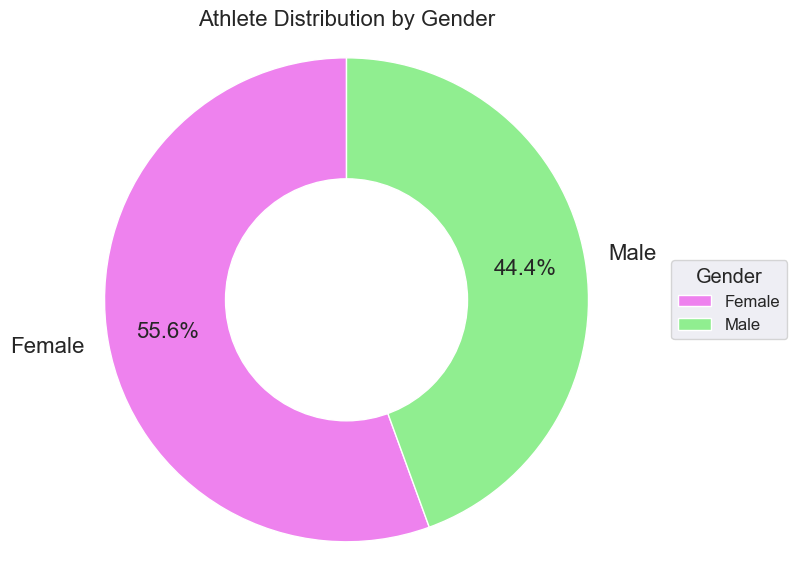

In [293]:
#display(Athletes)
gender_counts = Athletes['Gender'].value_counts()
# Creating donut chart
plt.figure(figsize=(8, 6))
colors = ['Violet', 'lightgreen']  # Lightgreen for male, violet for female
# Creating pie chart further turn into donut
plt.pie(gender_counts.values, labels=gender_counts.index, colors=colors,
        autopct=lambda pct: f'{pct:.1f}%', # This function will be used to format the percentage
        startangle=90, pctdistance=0.75,
        textprops={'fontsize': 16})  # Increase font size of percentage labels
# Creating a circle at the center to make it a donut chart
center_circle = plt.Circle((0,0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
# ensuring that pie is drawn as a circle
plt.axis('equal')
plt.title("Athlete Distribution by Gender", fontsize=16)
# Adding legend
plt.legend(gender_counts.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
plt.tight_layout()
plt.show()

Q80: Find the size of Tuple for any given input 


In [295]:
values =input("Please insert new item: ")
new_values =values.split(",")
a_tuple= tuple(new_values)
print(a_tuple)
print("size of tuple is ", len(a_tuple))

Please insert new item: 5, 7,3
('5', ' 7', '3')
size of tuple is  3
